In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, color

In [6]:
# 读取图像并转换为灰度
image = io.imread('./lena.jpeg')  # 替换为您的图像路径
gray_image = color.rgb2gray(image) if len(image.shape) == 3 else image
gray_image = gray_image[:128, :128]  # 确保图像是 128x128

# 创建样本数据
rows, cols = gray_image.shape
X = []
for i in range(rows):
    for j in range(cols):
        X.append([gray_image[i, j], i, j])
X = np.array(X)

In [7]:
# 应用 K-means 聚类
num_clusters = 5  # 可以根据需要调整聚类数量
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

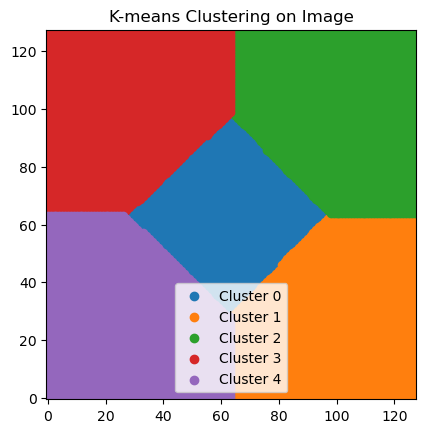

In [8]:
# 可视化聚类结果
fig, ax = plt.subplots()
for idx in range(num_clusters):
    cluster = X[labels == idx]
    ax.scatter(cluster[:, 1], cluster[:, 2], label=f'Cluster {idx}')
ax.imshow(gray_image, cmap='gray', alpha=0.5)
ax.set_title('K-means Clustering on Image')
ax.legend()
plt.gca().invert_yaxis()  # 翻转 y 轴以匹配图像坐标
plt.show()